# *Supervised Learning*
* 지도학습은 훈련 데이터로 부터하나의 함수를 유추해내기 위한 기계학습.
* 훈련 데이터는 일반적으로 입력 객체에 대한 속성을 벡터 형태로 포함하고 있으며,\
각각의 벡터에 대해 원하는 결과가 무엇인지 표시되어 있습니다.
* 이렇게 유추된 함수 중 연속적인 값을 출력하는 것 : 회귀 분석(Regression)
* 주어진 입력 벡터가 어떤 종류의 값인지 표시하는 것 : 분류 (Classification)

## Linear Regression
선형 회귀는 종속 변수와 한 개 이상의 독립 변수와의 선형 관계를 모델링 하는 회귀 분석 기법


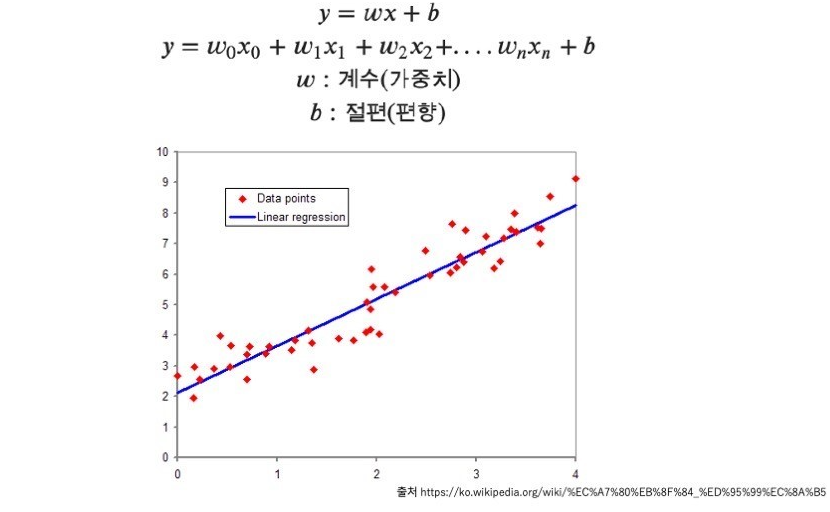

## Boston 집 값 예측
* 보스턴 집 값
* 13개의 요소로 구성된 데이터, 총 506개의 열로 구성 되어 있다.
사용하는 알고리즘에 따라 결과가 틀리게 산출된다.


In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# boston 집값 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 필요한 데이터를 변수로 저장
data = boston.data
label = boston.target
columns = boston.feature_names

In [6]:
# dataframe 형태로 시각화
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data.shape

(506, 13)

### Simple Linear Regression

In [8]:
# 데이터 준비
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, label,test_size=0.2,random_state=2022)

In [10]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71


In [11]:
# RM 으로만 예측을 한다.

X_train['RM']

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

In [12]:
# 1차원의 데이터는 sklearn을 사용할 수 없다. reshape를 이용해서 2차원 이상의 데이터로 변경한다. 데이터의 양을 알 수 없기 때문에 -1, 1
X_train['RM'].values.reshape(-1,1)[:5] # 스크롤 양을 조절하기위해 슬라이스 5개 까지

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [13]:
# linear Regression 로드
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [14]:
sim_lr.fit(X_train['RM'].values.reshape(-1,1), y_train)

LinearRegression()

In [15]:
# 테스트용 데이터에 대한 예측
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))
y_pred

array([21.45467216,  1.37246769, 18.86150431, 32.34201811, 16.3178244 ,
       20.75194347, 21.890166  , 15.83284262, 12.91305439, 13.76424689,
       22.06832257, 18.55467911, 22.31576225, 19.564233  , 18.51508876,
       31.15430764,  9.90418788, 11.43831389, 24.84954458, 19.94034132,
       19.31679332, 18.17857079,  3.64891275, 33.24269855, 26.56182717,
       42.53653295, 23.69152688, 17.65399867, 24.06763519, 26.03725505,
       19.4157692 , 26.51233924, 13.30895788, 15.53591501, 13.35844582,
       23.80040034,  8.97381468, 21.5041601 , 23.17685234, 47.31706758,
       18.77242603, 16.96116757, 18.53488393, 15.15980669, 21.63282873,
       31.23348834, 16.88198687, 26.22530921, 23.81029792, 23.53316548,
       23.78060516, 15.20929463, 30.57035   , 28.20482665, 25.41370705,
       10.02295892, 20.87071452, 21.890166  , -4.33844014, 15.86253538,
       22.7413585 , 28.23451941, 16.84239652, 27.0072186 , 25.23555048,
       19.84136545, 31.0355366 , 21.54375045, 21.22702766, 23.11

In [16]:
# 결과 보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

#{:.4f} 포맷팅 문자, 4를 사용해서 소숫점 4자리 까지.

단순 선형 회귀, R2 : 0.2121


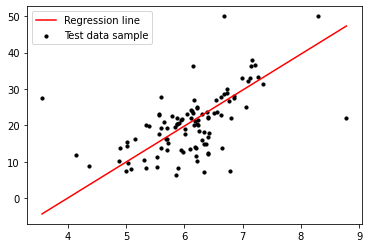

In [17]:
# 결과 시각화 하기
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10) # 방의 개수가 가장 작은 집과 가장 많은 집의 범위 점의 개수는 10개
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

In [18]:
# Multiple Linear Regression 모든 데이터로 예측
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred =mul_lr.predict(X_test)

In [20]:
print('다중 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2 : 0.6226


일반 적인 케이스로 Linear Regression으로 만족한 결과값이 나오기는 힘들다.


\
# Machin Learning Algorithm Based Regression
* 머신러닝 알고리즘 기반의 회기 모델도 있음
* scikit-learn에서는 아래와 같은 머신러닝 알고리즘 기반의 회귀 모델들이 있음.
  * 결정트리(Decision Tree Regression
  * 랜덤 포레스트
  * 서포트 벡터 머신 MLP
  * AdaBoost
  * Gradient Boosting

### Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=4) #max_depth -> 몇 단계 까지 내려 갈 것인가.

In [22]:
# RM의 값 하나로만.
dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)

DecisionTreeRegressor(max_depth=4)

In [23]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [24]:
print('단순 결정 트리 회귀 R2 : {:.4f}'.format(r2_score(y_test, y_pred))) # depth = 5 

단순 결정 트리 회귀 R2 : 0.3816


In [25]:
# 양호한 결과 값을 얻기 위해 depth를 조정한다. 4
print('단순 결정 트리 회귀 R2 : {:.4f}'.format(r2_score(y_test, y_pred))) 

단순 결정 트리 회귀 R2 : 0.3816


### overfitting
depth를 높이면 학습데이터만 regression line에 밀착하게 되기에 test데이터는 영향이 없기 때문에 overfitting 현상이 발생한다.
전체를 반복문으로 작성하여 가장 최적화 된 depth를 찾아 낸다.

In [26]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n단순 결정 트리 회귀 depth ={} R2 : {:.4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))


단순 결정 트리 회귀 depth =1 R2 : 0.2459

단순 결정 트리 회귀 depth =2 R2 : 0.3547

단순 결정 트리 회귀 depth =3 R2 : 0.3931

단순 결정 트리 회귀 depth =4 R2 : 0.3816

단순 결정 트리 회귀 depth =5 R2 : 0.3247

단순 결정 트리 회귀 depth =6 R2 : 0.3474

단순 결정 트리 회귀 depth =7 R2 : 0.3164

단순 결정 트리 회귀 depth =8 R2 : 0.3368

단순 결정 트리 회귀 depth =9 R2 : 0.3098

단순 결정 트리 회귀 depth =10 R2 : 0.2579
최적의 결과는 depth=3 r2=0.3931


In [28]:
# 전체값으로
dt_regr = DecisionTreeRegressor(max_depth=5)

In [29]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [30]:
y_pred = dt_regr.predict(X_test)

In [31]:
print('다중 결정 트리 회귀 R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 회귀 R2 : 0.6888


In [32]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train, y_train)
  y_pred = dt_regr.predict(X_test)
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n다중 결정 트리 회귀 depth ={} R2 : {:.4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))


다중 결정 트리 회귀 depth =1 R2 : 0.2459

다중 결정 트리 회귀 depth =2 R2 : 0.5316

다중 결정 트리 회귀 depth =3 R2 : 0.6575

다중 결정 트리 회귀 depth =4 R2 : 0.6835

다중 결정 트리 회귀 depth =5 R2 : 0.6864

다중 결정 트리 회귀 depth =6 R2 : 0.7029

다중 결정 트리 회귀 depth =7 R2 : 0.7354

다중 결정 트리 회귀 depth =8 R2 : 0.7582

다중 결정 트리 회귀 depth =9 R2 : 0.7459

다중 결정 트리 회귀 depth =10 R2 : 0.7156
최적의 결과는 depth=8 r2=0.7582
